## Main file

In [1]:
import pandas as pd
from preprocessing.cleaner import convert_cat_to_num,missing_value
from preprocessing.test import test as p_test
from preprocessing.label import label_encoder
from preprocessing.split import split
from visualization.maps import heatmap,nan_map
from sklearn.svm import SVC
from training.hyperparameters_tuning import hyperparameters_tuning
from training.train_models import train_models
from training.evaluation import cla_evaluation
from sklearn.ensemble import RandomForestClassifier

### Kidney disease

In [2]:
TARGET_NAME = "class"
DATA_NAME = "kidney"
FEATURES = ["id","age","bp","sg","al","su","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc"]
import json
with open("settings.json") as file:
            settings = json.load(file) # Retrieve paths 

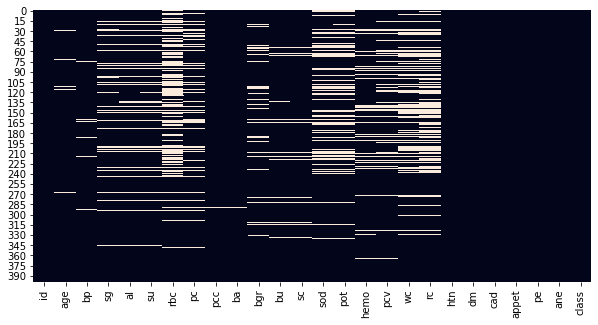

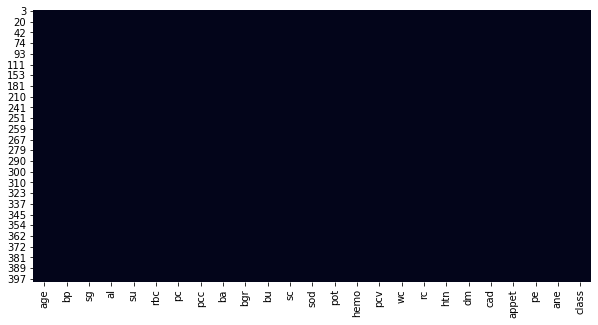

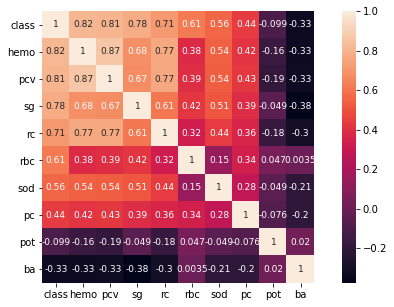

Best combination of parameters is : {'C': 1, 'kernel': 'linear'}


In [3]:
# Preprocessing
data = pd.read_csv(settings["paths"][DATA_NAME])                    # Read the csv file
nan_map(data)
clean_data_1 = convert_cat_to_num(data,FEATURES)                    # Convert object datatype to float when its possible
clean_data_2 = missing_value(clean_data_1,drop_num=True)            # Fill the missing values
nan_map(clean_data_2)
p_test(clean_data_2,data)                                           # Test the length of data after cleaning process
label_data,label_dico = label_encoder(clean_data_2)                 # Encode strings data
X_train, X_test, y_train, y_test = split(label_data,TARGET_NAME)

# Vizualisation
heatmap(clean_data_2,TARGET_NAME)

# Models

svm = SVC(C=10,kernel="radius")
parameters_svc = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

#Fine tuning parameters

logs_svm, best_svm = hyperparameters_tuning(svm,parameters_svc,X_train,y_train,cv=5)

#Training
Models = {"SVM":best_svm}
perf_train, perf_test = train_models(Models,X_train,X_test,y_train,y_test,cv=5)

In [4]:
logs_svm

{"{'C': 1, 'kernel': 'linear'}": 0.9834834834834835,
 "{'C': 1, 'kernel': 'rbf'}": 0.7036036036036035,
 "{'C': 10, 'kernel': 'linear'}": 0.9834834834834835,
 "{'C': 10, 'kernel': 'rbf'}": 0.7033033033033034}

In [5]:
for name,m in Models.items():
    print(f"Accuracy of {name}")
    cla_evaluation(m,X_test,y_test)

Accuracy of SVM
[[ 9  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        12

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



### Banknote

In [10]:
TARGET_NAME = "class"
DATA_NAME = "banknote"
FEATURES = ["variance","skewness","curtosis","entropy"]
import json
with open("settings.json") as file:
            settings = json.load(file) # Retrieve paths 

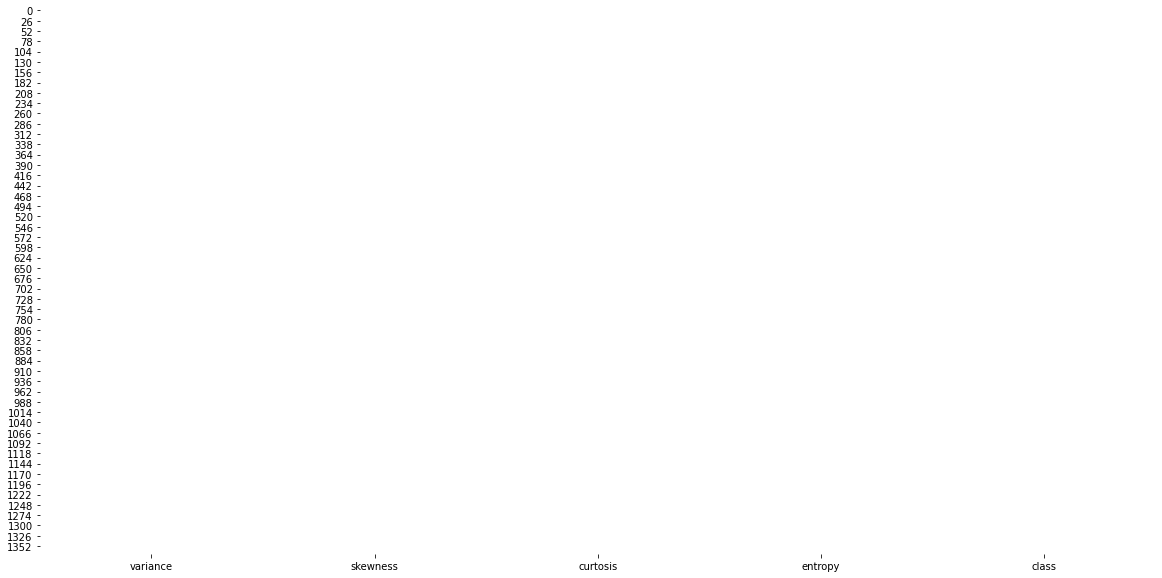

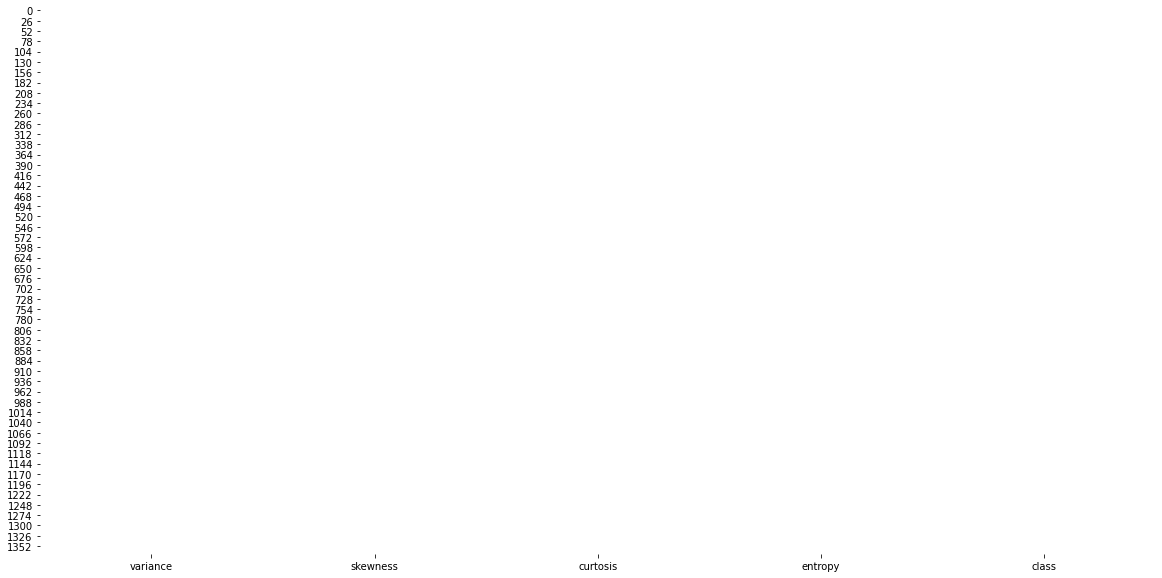

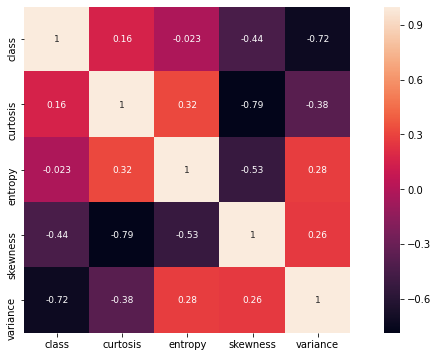

{'C': 10, 'kernel': 'rbf'}


In [11]:
# Preprocessing
data = pd.read_csv(settings["paths"][DATA_NAME])                    # Read the csv file
nan_map(data)
clean_data_1 = convert_cat_to_num(data,FEATURES)                    # Convert object datatype to float when its possible
clean_data_2 = missing_value(clean_data_1,drop_num=True)            # Fill the missing values
nan_map(clean_data_2)
p_test(clean_data_2,data)                                           # Test the length of data after cleaning process
label_data,label_dico = label_encoder(clean_data_2)                 # Encode strings data
X_train, X_test, y_train, y_test = split(label_data,TARGET_NAME)

# Vizualisation
heatmap(clean_data_2,TARGET_NAME)

# Models

svm = SVC(C=10,kernel="radius")
parameters_svc = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

#Fine tuning parameters

logs, best_svm = hyperparameters_tuning(svm,parameters_svc,X_train,y_train,cv=5)
#Training
Models = {"SVM":best_svm}

perf_train, perf_test = train_models(Models,X_train,X_test,y_train,y_test,cv=5)